# Heart Disease Analysis

Import the dataset and project dependencies

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("heart.csv")

In [26]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Data Visualization

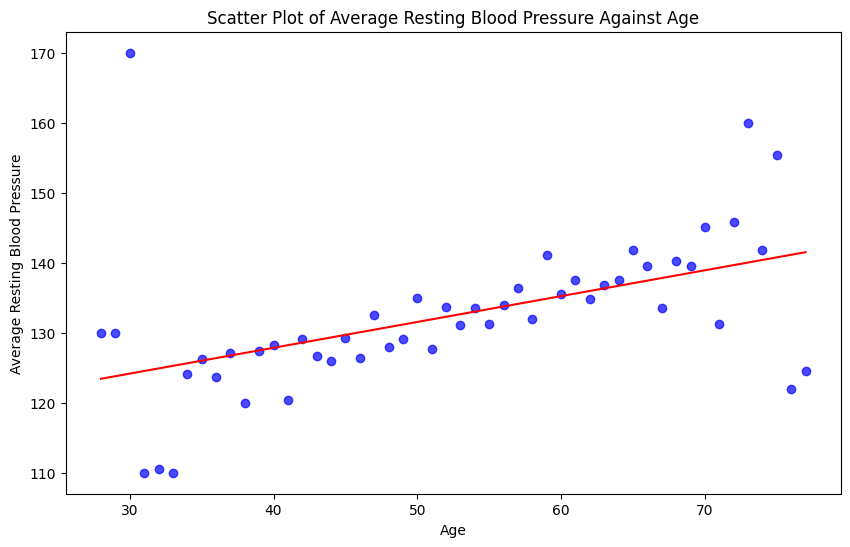

In [28]:
average_resting_bp = df.groupby('Age')['RestingBP'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_resting_bp['Age'], average_resting_bp['RestingBP'], color='blue', alpha=0.7)

# Add a line of best fit
coefficients = np.polyfit(average_resting_bp['Age'], average_resting_bp['RestingBP'], 1)
line = np.polyval(coefficients, average_resting_bp['Age'])
plt.plot(average_resting_bp['Age'], line, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Average Resting Blood Pressure')
plt.title('Scatter Plot of Average Resting Blood Pressure Against Age')

# Show the plot
plt.show()

As one gets older, their resting blood pressure tends to increase.

## Clean the data

There are concerning minimum values in cholesterol and resting blood pressure.

In [29]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There are no null values.

In [30]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is a single row where an patient has a resting blood presssure of zero. We can remove this row.

In [31]:
df = df[df["RestingBP"] != 0]

There are a number of rows where the patient has a cholesterol of zero. We should replace those values with the average cholesterol since there are many of those rows.

In [32]:
# Replace zero Cholesterol with NaN
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

# Replace the NaN values with the mean Cholesterol.
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)

## Splitting the Data

## Classification Training

### k-Nearest Neighbour

### Decision Tree

### Random Forest